# **N - QUEENS**


---

**PROBLEM STATEMENT:**Given an N×N chessboard, you need to find a way to place N queens such that no two queens threaten each other. This means that for each queen placed on the board:

   * No two queens share the same row.
   * No two queens share the same column.
   * No two queens share the same diagonal (both ascending and descending diagonals).

Your task is to find one or more solutions to the N-Queens problem, which represent valid placements of queens on the chessboard without any conflicts.

**Input:**

    An integer N, representing the size of the N×N chessboard.

**Output:**

    A valid configuration of N queens on the chessboard, where each queen's position is represented as a pair of row and column indices.
    If there are multiple solutions, you can return any one of them. italicized text

**Approach:**

Solving the N-Queens problem involves finding a way to place N queens on an N×N chessboard such that no two queens threaten each other. The primary challenge is to ensure that queens do not share the same row, column, or diagonal. This problem is typically solved using backtracking algorithms. Here's a detailed approach to solving the N-Queens problem:

1. **Initialization:** Start with an empty N×N chessboard.

2. **Place Queens Recursively:** Begin by placing queens on the chessboard one by one. Start with the first row and progress row by row.

3. **Base Case:** When placing queens, you need to consider the following scenarios:
   - **Base Case 1:** If you have successfully placed N queens on the board (all rows are filled), you have found a valid solution. Record this solution.
   - **Base Case 2:** If you are trying to place a queen in the last row (Nth row) and it does not conflict with any previously placed queens, this is also a valid solution. Record it.
   - **Base Case 3:** If you reach a row where there is no valid column to place the queen (due to conflicts), backtrack to the previous row and try different columns for the queen.

4. **Conflict Checking:** To ensure that no two queens threaten each other, you need to check for conflicts:
   - **Row Conflicts:** Ensure that there is only one queen in each row.
   - **Column Conflicts:** Ensure that there is only one queen in each column.
   - **Diagonal Conflicts:** Ensure that there are no queens on the same ascending or descending diagonals.

5. **Backtracking:** If you encounter a conflict, you need to backtrack and try different positions for the queen in the current row or previous rows until you find a valid placement.

6. **Repeat:** Repeat steps 3 to 5 recursively until all valid solutions are found or all possibilities are exhausted.

**Algorithms Used:**

1. **Backtracking:** The main algorithm used to solve the N-Queens problem is backtracking. Backtracking is a systematic search algorithm that tries different possibilities and backtracks when a conflict is encountered, ultimately finding all valid solutions.

2. **Constraint Propagation:** In the N-Queens problem, constraint propagation is used to identify valid positions for queens. It ensures that queens do not conflict with each other by checking for row, column, and diagonal constraints.

3. **Recursion:** Recursion is a key component of the backtracking algorithm. It allows you to systematically explore different combinations of queen placements and backtrack when conflicts are encountered.





In [11]:
def solveNQueens(n):
    def is_safe(board, row, col):
        # Check if there is a queen in the same column
        for i in range(row):
            if board[i][col] == 'Q':
                return False

        # Check the left upper diagonal
        for i, j in zip(range(row, -1, -1), range(col, -1, -1)):
            if board[i][j] == 'Q':
                return False

        # Check the right upper diagonal
        for i, j in zip(range(row, -1, -1), range(col, n)):
            if board[i][j] == 'Q':
                return False

        return True

    def solve(row):
        if row == n:
            solutions.append([''.join(row) for row in board])
            return

        for col in range(n):
            if is_safe(board, row, col):
                board[row][col] = 'Q'
                solve(row + 1)
                board[row][col] = '*'

    board = [['*' for _ in range(n)] for _ in range(n)]
    solutions = []
    solve(0)

    return solutions

def print_solutions_as_grid(solutions):
    for solution in solutions:
        for row in solution:
            print(row,end=" ")
        print()

def display_solutions(n):
    solutions = solveNQueens(n)
    for i, solution in enumerate(solutions, start=1):
        print(f"Solution {i}:")
        print_solutions_as_grid(solution)

# Example usage:
n = 4
display_solutions(n)


Solution 1:
* Q * * 
* * * Q 
Q * * * 
* * Q * 
Solution 2:
* * Q * 
Q * * * 
* * * Q 
* Q * * 


In [17]:
import matplotlib.pyplot as plt
import time
import resource

def solveNQueens(n):
    def is_safe(board, row, col):
        # Check if there is a queen in the same column
        for i in range(row):
            if board[i][col] == 'Q':
                return False

        # Check the left upper diagonal
        for i, j in zip(range(row, -1, -1), range(col, -1, -1)):
            if board[i][j] == 'Q':
                return False

        # Check the right upper diagonal
        for i, j in zip(range(row, -1, -1), range(col, n)):
            if board[i][j] == 'Q':
                return False

        return True

    def solve(row):
        if row == n:
            solutions.append([''.join(row) for row in board])
            return

        for col in range(n):
            if is_safe(board, row, col):
                board[row][col] = 'Q'
                solve(row + 1)
                board[row][col] = '.'

    board = [['.' for _ in range(n)] for _ in range(n)]
    solutions = []
    solve(0)

    return solutions

def time_and_space_complexity_analysis(max_n):
    time_complexity_data = []
    space_complexity_data = []

    for n in range(1, max_n + 1):
        start_time = time.time()
        solutions = solveNQueens(n)
        end_time = time.time()
        elapsed_time = end_time - start_time

        # Measure space complexity using resource library
        space_complexity = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss

        time_complexity_data.append(elapsed_time)
        space_complexity_data.append(space_complexity)

    return time_complexity_data, space_complexity_data

max_n = 12  # Maximum board size to analyze
n_values = list(range(1, max_n + 1))

time_complexity, space_complexity = time_and_space_complexity_analysis(max_n)

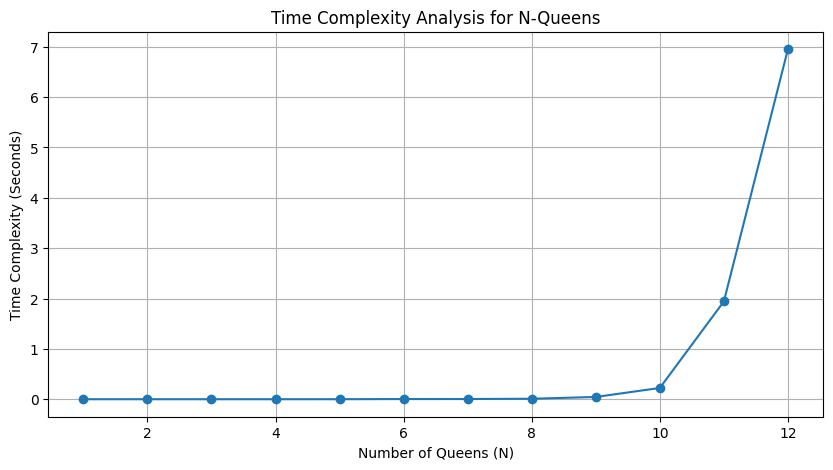

In [18]:
# Plot time complexity
plt.figure(figsize=(10, 5))
plt.plot(n_values, time_complexity, marker='o')
plt.xlabel('Number of Queens (N)')
plt.ylabel('Time Complexity (Seconds)')
plt.title('Time Complexity Analysis for N-Queens')
plt.grid()

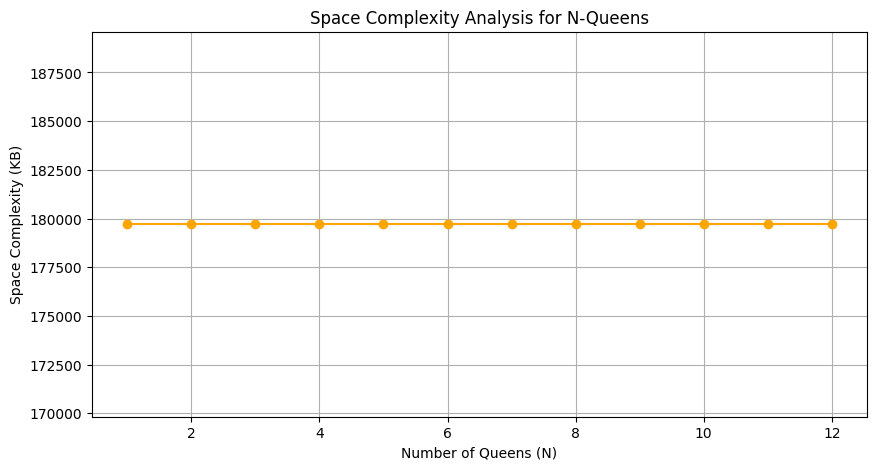

In [19]:
# Plot space complexity
plt.figure(figsize=(10, 5))
plt.plot(n_values, space_complexity, marker='o', color='orange')
plt.xlabel('Number of Queens (N)')
plt.ylabel('Space Complexity (KB)')
plt.title('Space Complexity Analysis for N-Queens')
plt.grid()

plt.show()